#### Code to plot the characteristics of the different selected areas of the feature space
##### Author: Claudia Acquistapace
##### date: 06/02/2023
##### code to plot final plot for publication of the wet/dry analysis from ERA5 data



In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import rcParams
from warnings import warn
import datetime as dt
from scipy import interpolate
import matplotlib as mpl
import os.path
import itertools
import os.path

path_out = '/net/ostro/ML_work_DC/era5_dry_wet/vars_histograms/'


# reading the datasets to compare
wet_only = xr.open_dataset('/net/ostro/ML_work_DC/era5_dry_wet/wet_only_era5.nc')
wet_in_dry = xr.open_dataset('/net/ostro/ML_work_DC/era5_dry_wet/wet_in_dry_era5.nc')
dry_in_wet = xr.open_dataset('/net/ostro/ML_work_DC/era5_dry_wet/dry_in_wet_era5.nc')

# selecting wet data from the wet in dry area
ind_wet = np.where(wet_in_dry.im_type.values == 0)[0]
ind_dry = np.where(wet_in_dry.im_type.values == 1)[0]
# creating 2 separated datasets
wet_wet_in_dry = wet_in_dry.isel(n_crops=ind_wet)
dry_only = wet_in_dry.isel(n_crops=ind_dry)

plotting histograms of SST


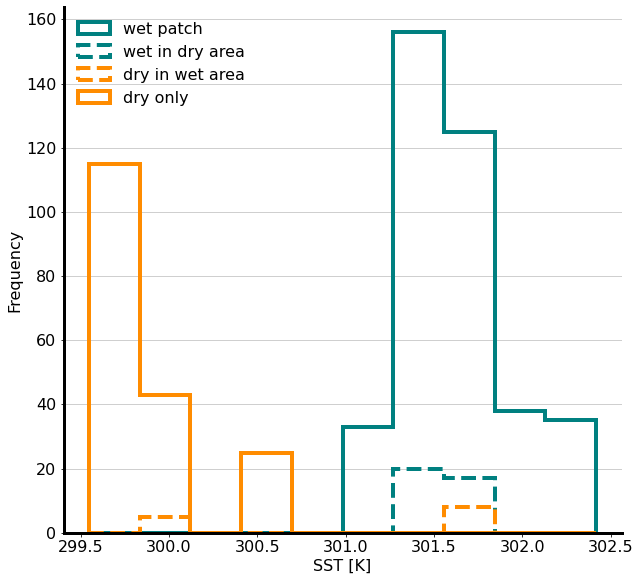

In [13]:
# reading SST variables
var_name = 'SST'
var_wet_only = wet_only[var_name].values
var_wet_wet_in_dry = wet_wet_in_dry[var_name].values
var_dry_only = dry_only[var_name].values
var_dry_in_wet = dry_in_wet[var_name].values

# plot quicklook of filtered and corrected mdv for checking
labelsizeaxes   = 14
fontSizeTitle   = 16
fontSizeX       = 16
fontSizeY       = 16
cbarAspect      = 10
fontSizeCbar    = 16
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.rcParams.update({'font.size':16})


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
rcParams['font.sans-serif'] = ['Tahoma']
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
matplotlib.rcParams['savefig.dpi'] = 100
plt.gcf().subplots_adjust(bottom=0.15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)

minval = np.nanmin([np.nanmin(var_wet_only), np.nanmin(var_wet_wet_in_dry), np.nanmin(var_dry_only), np.nanmin(var_dry_in_wet)])
maxval = np.nanmax([np.nanmax(var_wet_only), np.nanmax(var_wet_wet_in_dry), np.nanmax(var_dry_only), np.nanmax(var_dry_in_wet)])

# An "interface" to matplotlib.axes.Axes.hist() method
n_d, bins_d, patches_d = ax.hist(x=var_wet_only, bins=10, range=[minval, maxval], color='teal',\
                                 alpha=1, histtype="step", label='wet patch', align='mid', linewidth=4)
n_w, bins_w, patches_w = ax.hist(x=var_wet_wet_in_dry, bins=10, range=[minval, maxval], color='teal',\
                                            alpha=1, histtype="step",  label='wet in dry area', align='mid', linewidth=4, linestyle='--')
n_dd, bins_dd, patches_dd = ax.hist(x=var_dry_in_wet, bins=10, range=[minval, maxval], color='darkorange',\
                                 alpha=1, histtype="step", label='dry in wet area', align='mid', linewidth=4, linestyle='--')
n_ww, bins_ww, patches_ww = ax.hist(x=var_dry_only, bins=10, range=[minval, maxval], color='darkorange',\
                                            alpha=1, histtype="step", label='dry only', align='mid', linewidth=4)
ax.legend(frameon=False, loc='upper left')
ax.grid(axis='y', alpha=0.75)
ax.set_xlabel(var_name+' [K]')
ax.set_ylabel('Frequency')
#maxfreq = n.max()
# Set a clean upper y-axis limit.
#ax.set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
fig.savefig(path_out+var_name+'_all_areas.png', format='png')

/tmp/ipykernel_2391924/1149669822.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)


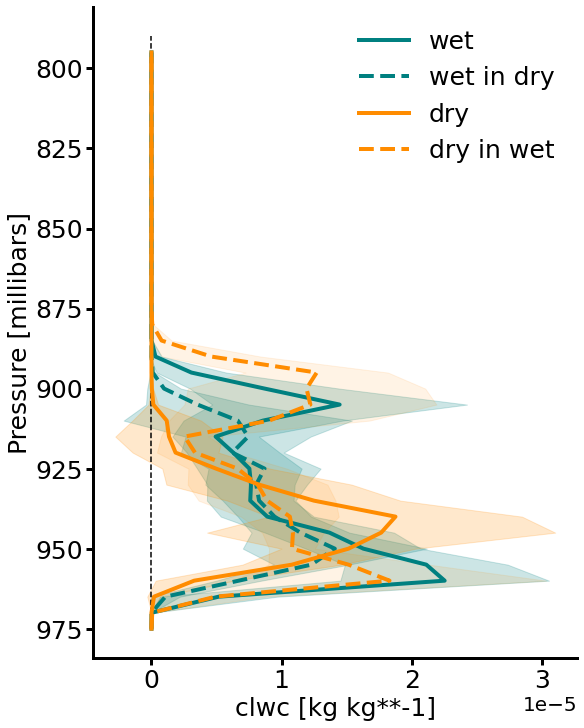

In [27]:
 # reading data from the dictionary for the plot
    
var_name = 'clwc'
mean_wet = np.nanmean(wet_only[var_name].values, axis=0)
std_wet = np.nanstd(wet_only[var_name].values, axis=0)
mean_wet_in_dry = np.nanmean(wet_wet_in_dry[var_name].values, axis=0)
std_wet_in_dry = np.nanstd(wet_wet_in_dry[var_name].values, axis=0)
mean_dry = np.nanmean(dry_only[var_name].values, axis=0)
std_dry = np.nanstd(dry_only[var_name].values, axis=0)
mean_dry_in_wet = np.nanmean(dry_in_wet[var_name].values, axis=0)
std_dry_in_wet = np.nanstd(dry_in_wet[var_name].values, axis=0)


levels = wet_only.levels.values
strlev = []
for ind, lev in enumerate(levels):
    strlev.append(str(lev))

dict_plot_settings = {
    'labelsizeaxes':25,
    'fontSizeTitle':25,
    'fontSizeX'    :25,
    'fontSizeY'    :25,
    'cbarAspect'   :25,
    'fontSizeCbar' :25,
    'rcparams_font':['Tahoma'],
    'savefig_dpi'  :100,
    'font_size'    :25,
    'grid'         :True}    
fig, axs = plt.subplots(figsize=(8,10), constrained_layout=True)
# plots settings defined by user at the top
labelsizeaxes   = dict_plot_settings['labelsizeaxes']
fontSizeTitle   = dict_plot_settings['fontSizeTitle']
fontSizeX       = dict_plot_settings['fontSizeX']
fontSizeY       = dict_plot_settings['fontSizeY']
cbarAspect      = dict_plot_settings['cbarAspect']
fontSizeCbar    = dict_plot_settings['fontSizeCbar']
matplotlib.rcParams['savefig.dpi'] = dict_plot_settings['savefig_dpi']
plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
grid = dict_plot_settings['grid']
matplotlib.rc('xtick', labelsize=20)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=20) # sets dimension of ticks in the plots    fs = 32
#ax1.set_xlim(binned_sst[0]-1.5, binned_sst[-1]+0.1)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_linewidth(3)
axs.spines['left'].set_linewidth(3)
#ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs.tick_params(which='minor', length=5, width=2)
axs.tick_params(which='major', length=7, width=3)
#ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs.vlines(0.,0, len(levels), linestyle='--', color='black')
axs.tick_params(axis='both', labelsize=dict_plot_settings['labelsizeaxes'])    

axs.plot(mean_wet, np.arange(len(levels)), linewidth=4, rasterized=True, color='teal', label='wet')    
axs.fill_betweenx(np.arange(len(levels)), mean_wet-std_wet, mean_wet+std_wet, color='teal', alpha=0.2)

axs.plot(mean_wet_in_dry, np.arange(len(levels)), 'teal', linewidth=4, rasterized=True, label='wet in dry', linestyle='--')    
axs.fill_betweenx(np.arange(len(levels)), mean_wet_in_dry-std_wet_in_dry, mean_wet_in_dry+std_wet_in_dry, color='teal', alpha=0.2)

axs.plot(mean_dry, np.arange(len(levels)), 'darkorange', linewidth=4, rasterized=True, label='dry')    
axs.fill_betweenx(np.arange(len(levels)), mean_dry-std_dry, mean_dry+std_dry, color='darkorange', alpha=0.2)

axs.plot(mean_dry_in_wet, np.arange(len(levels)), 'darkorange', linewidth=4, rasterized=True, label='dry in wet', linestyle='--')  
axs.fill_betweenx(np.arange(len(levels)), mean_dry_in_wet-std_dry_in_wet, mean_dry_in_wet+std_dry_in_wet, color='darkorange', alpha=0.1)

axs.set_ylabel('Pressure ['+wet_only.levels.units+']')
axs.set_xlabel(var_name+' ['+wet_only[var_name].units+']')

axs.set_yticklabels(strlev)
axs.legend(frameon=False)
#axs.set_xlim(-0.2, 0.2)
fig.savefig(path_out+var_name+'_profiles_all_areas.png')
